In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [2]:
dt = pd.read_csv('heart_cleveland_upload.csv')
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
X = dt.drop(columns='condition')
X.shape

(297, 13)

In [4]:
y = dt['condition']
y.shape

(297,)

In [5]:
print(f"Columns in X: ", X.columns)
print(f"y: ", y.name)

Columns in X:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
y:  condition


In [6]:
# from sklearn.preprocessing import LabelEncoder
# LE = LabelEncoder()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((237, 13), (60, 13), (237,), (60,))

In [8]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
282,43,1,3,120,177,0,2,120,1,2.5,1,0,2
81,67,0,2,152,277,0,0,172,0,0.0,0,1,0
108,54,1,2,120,258,0,2,147,0,0.4,1,0,2
146,42,1,2,130,180,0,0,150,0,0.0,0,0,0
217,58,1,3,146,218,0,0,105,0,2.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,53,0,3,130,264,0,2,143,0,0.4,1,0,0
192,61,1,3,120,260,0,0,140,1,3.6,1,1,2
117,52,1,2,172,199,1,0,162,0,0.5,0,0,2
47,52,1,1,134,201,0,0,158,0,0.8,0,1,0


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [10]:
# X_train

In [11]:
# nn = tf.keras.models.Sequential()

In [12]:
# nn.add(tf.keras.layers.Dense(units=5, activation="sigmoid", name="layer1"))
# nn.add(tf.keras.layers.Dense(units=3, activation="sigmoid", name="layer2"))
# nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid", name="layer3"))

In [13]:
# Compile Neural Network

# model = nn.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [14]:
# model = create_model()


In [15]:
X_train[0]

array([-1.28971679,  0.72734604,  0.90324872, -0.66766219, -1.29709962,
       -0.42320737,  1.06550001, -1.31734051,  1.560379  ,  1.25143969,
        0.67919832, -0.69877922,  1.25304084])

In [16]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

nn_fit was not working because we had a categorical loss in create_model(). So we had to convert the data into categorical first


In [17]:
y_test

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

def create_model():
    model = Sequential()
    model.add(Dense(units=16, input_dim=13, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dropout(0.25))
    
    model.add(Dense(units=8, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dropout(0.25))
    
    model.add(Dense(units=2, activation='sigmoid'))
    
    
    
    adam = Adam(learning_rate= 0.001)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [19]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Activation, Dropout, Flatten, Dense
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# import warnings

# classifier = Sequential()

# # Adding the input layer and the first hidden layer
# classifier.add(Dense(init = 'uniform', activation = 'sigmoid', units=16))

# # Adding the second hidden layer
# classifier.add(Dense(init = 'uniform', activation = 'sigmoid', units=8))

# # Adding the output layer
# classifier.add(Dense(units=1, init = 'uniform', activation = 'sigmoid'))

# # Compiling the ANN
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
model = create_model()

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
nn_fit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10)

Epoch 1/100
24/24 [==============================] - 2s 17ms/step - loss: 0.8975 - accuracy: 0.5865 - val_loss: 1.1824 - val_accuracy: 0.3667
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8495 - accuracy: 0.5865 - val_loss: 1.0215 - val_accuracy: 0.3667
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 0.7617 - accuracy: 0.5612 - val_loss: 0.9023 - val_accuracy: 0.3667
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.7074 - accuracy: 0.5865 - val_loss: 0.8205 - val_accuracy: 0.3667
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 0.7112 - accuracy: 0.5654 - val_loss: 0.7709 - val_accuracy: 0.3667
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6815 - accuracy: 0.5781 - val_loss: 0.7328 - val_accuracy: 0.3667
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6450 - accuracy: 0.6203 - val_loss: 0.7078 - val_accuracy: 0.3667
Epoch 8/100


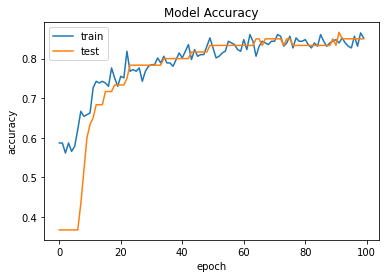

In [23]:
# Accuracy of training and testing for 100 iterations

plt.plot(nn_fit.history['accuracy'])
plt.plot(nn_fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [24]:
# from sklearn.metrics import classification_report, accuracy_score

prediction = model.predict(X_test)
temp = 0

pred = []

for i in range(60):
    if(prediction[i][1] > 0.5):
        pred.append(1)
    else:
        pred.append(0)

for i in range(X_test.shape[0]):
    if(pred[i] == y_test[i][1]):
        temp += 1

acc = (((temp/X_test.shape[0]) + (temp%X_test.shape[0]))/X_test.shape[0])*100

2/2 [==============================] - 0s 4ms/step


In [25]:
temp / X_test.shape[0]

0.8166666666666667

In [26]:
temp % X_test.shape[0]

49

In [27]:
print(f"Testing accuracy: ", acc)

Testing accuracy:  83.02777777777777


In [28]:
X_test.shape[0]

60

In [31]:
# prediction

In [30]:
# y_test

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.